In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                                             
warnings.filterwarnings('ignore')

In [2]:
Ball_by_Ball=pd.read_csv(r"C:\Users\ASUS\Desktop\Python Projects EDA\IPL Ball-by-Ball 2008-2020.csv")
matches=pd.read_csv(r"C:\Users\ASUS\Desktop\Python Projects EDA\matches.csv")

In [87]:
Ball_by_Ball.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [4]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
matches.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
Ball_by_Ball.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind      183973
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [7]:
Ball_by_Ball.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193463    False
193464    False
193465    False
193466    False
193467    False
Length: 193468, dtype: bool

In [8]:
# Ball_by_Ball.drop_duplicates(inplace=True)

In [9]:
Ball_by_Ball.shape

(193468, 18)

In [10]:
matches.shape

(756, 18)

In [11]:
Ball_by_Ball.columns

Index(['id', 'inning', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'batsman_runs', 'extra_runs', 'total_runs', 'non_boundary', 'is_wicket',
       'dismissal_kind', 'player_dismissed', 'fielder', 'extras_type',
       'batting_team', 'bowling_team'],
      dtype='object')

In [12]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
matches['Season'] = pd.DatetimeIndex(matches['date']).year  #EXTRACT YEAR FROM DATE

In [14]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
matches['player_of_match'].value_counts()

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: count, Length: 226, dtype: int64

In [16]:
matches['player_of_match'].value_counts()[0:10]

player_of_match
CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
MEK Hussey        12
Name: count, dtype: int64

Top 10 players for Man of the match

In [17]:
matches['player_of_match'].value_counts()[0:10].keys() 

Index(['CH Gayle', 'AB de Villiers', 'RG Sharma', 'MS Dhoni', 'DA Warner',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey'],
      dtype='object', name='player_of_match')

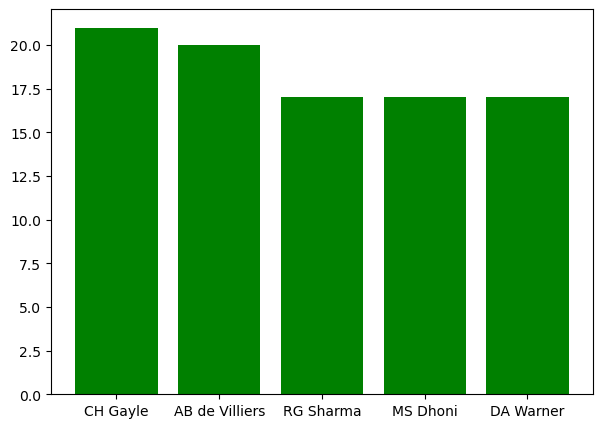

In [18]:
plt.figure(figsize=(7,5))
plt.bar(list(matches['player_of_match'].value_counts()[0:5].keys()),list(matches['player_of_match'].value_counts()[0:5]),color='g')
plt.show()

In [19]:
matches['result'].value_counts()

result
normal       743
tie            9
no result      4
Name: count, dtype: int64

In [20]:
matches['toss_winner'].value_counts()

toss_winner
Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: count, dtype: int64

In [21]:
batting_first=matches[matches['win_by_runs']!=0]

In [22]:
batting_first.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,5,2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,9,2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,14,2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,15,2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


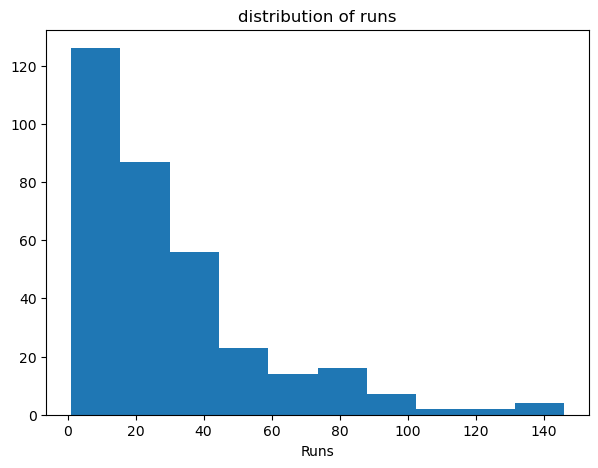

In [23]:
plt.figure(figsize=(7,5))
plt.hist(batting_first['win_by_runs'])
plt.title("distribution of runs")
plt.xlabel('Runs')
plt.show()

In [24]:
batting_first['winner'].value_counts()

winner
Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Rising Pune Supergiants         2
Gujarat Lions                   1
Name: count, dtype: int64

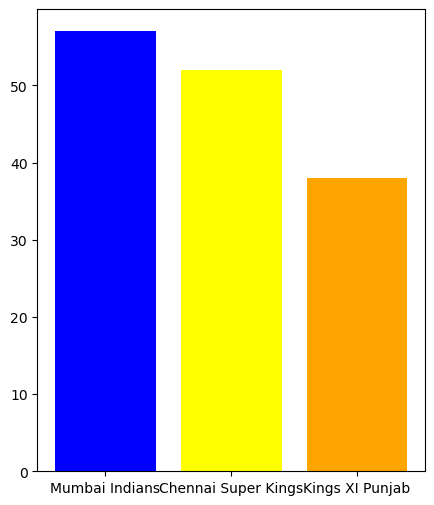

In [25]:
plt.figure(figsize=(5,6))
plt.bar(list(batting_first['winner'].value_counts()[0:3].keys()),list(batting_first['winner'].value_counts()[0:3]),color=["blue","yellow","orange"])
plt.show()

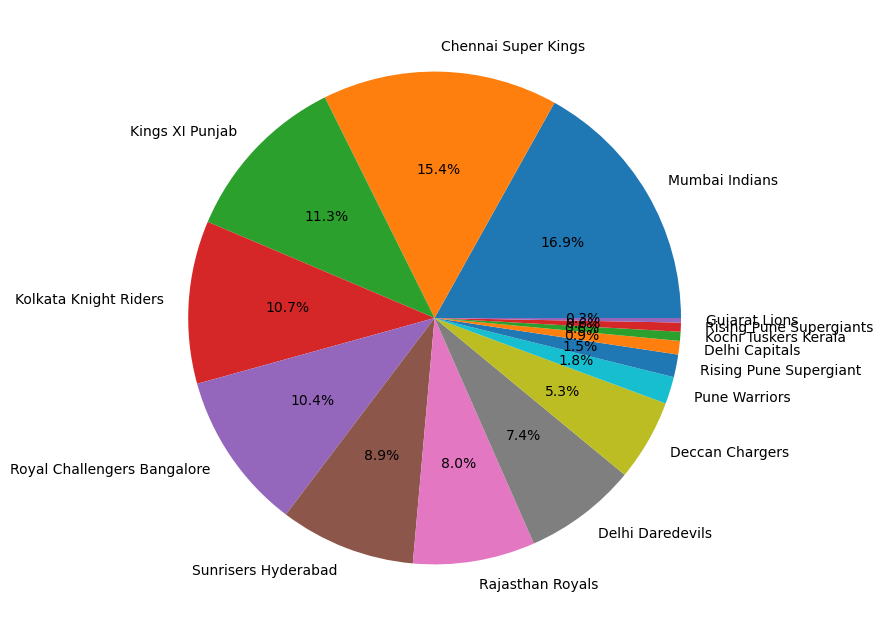

In [26]:
plt.figure(figsize=(8,8))
plt.pie(list(batting_first["winner"].value_counts()),labels=list(batting_first["winner"].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [27]:
batting_second=matches[matches["win_by_wickets"]!=0]

In [28]:
batting_second.head(5)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,2,2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,6,2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


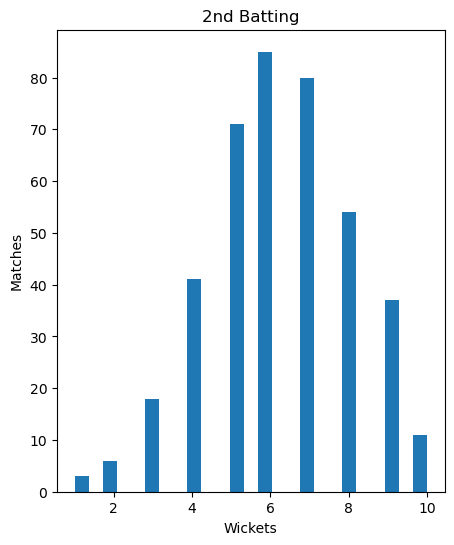

In [29]:
plt.figure(figsize=(5,6))
plt.hist(batting_second["win_by_wickets"],bins=25)
plt.title('2nd Batting')
plt.xlabel('Wickets')
plt.ylabel('Matches')
plt.show()

In [30]:
batting_second["winner"].value_counts()

winner
Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: count, dtype: int64

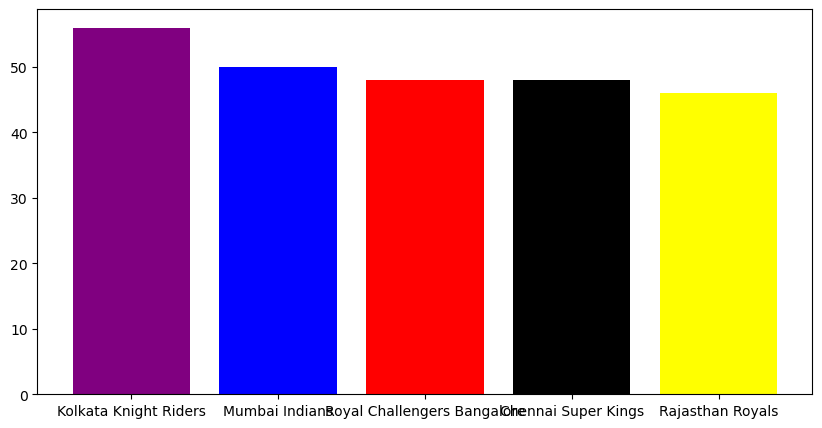

In [31]:
plt.figure(figsize=(10,5))
plt.bar(list(batting_second['winner'].value_counts()[0:5].keys()),list(batting_second['winner'].value_counts()[0:5]),color=['purple','blue','red','black','yellow'])
plt.show()

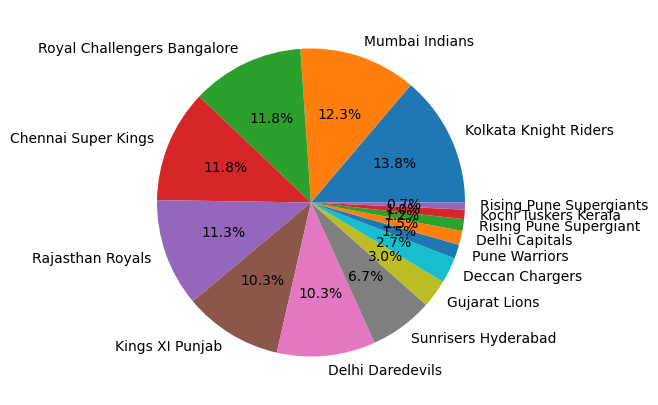

In [32]:
plt.figure(figsize=(5,5))
plt.pie(list(batting_second['winner'].value_counts()),labels=list(batting_second['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [33]:
matches["city"].value_counts()

city
Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: count, dtype: int64

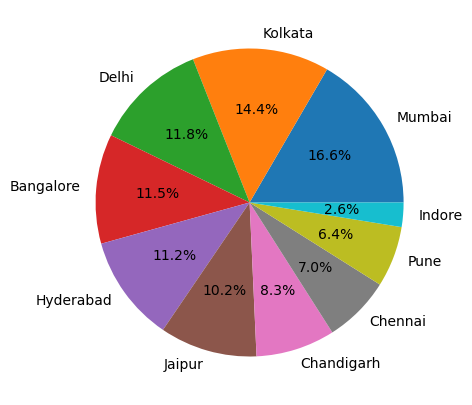

In [34]:
plt.figure(figsize=(8,5))
plt.pie(list(batting_second['city'].value_counts()[0:10]),labels=list(batting_second['city'].value_counts()[0:10].keys()),autopct='%0.1f%%')
plt.show()

In [35]:
import numpy as np
np.sum(matches['toss_winner']==matches['winner'])

393

In [36]:
all_data=Ball_by_Ball.merge(matches[['id','Season','winner']],left_on='id',right_on='id',how='inner')
all_data.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team,Season,winner


In [37]:
print("Total number of matches :",matches.shape[0])


Total number of matches : 756


In [38]:
print("\n Cities played at :",matches['city'].unique())


 Cities played at : ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan
 'Mohali' 'Bengaluru']


In [39]:
print("Total number of teams :",matches['team1'].unique())

Total number of teams : ['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Royal Challengers Bangalore'
 'Kolkata Knight Riders' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']


# Matches in Every Season

In [40]:
match_per_season=matches.groupby(['Season'])['id'].count().reset_index().rename(columns={'id':'Matches'})
match_per_season

,Season,Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


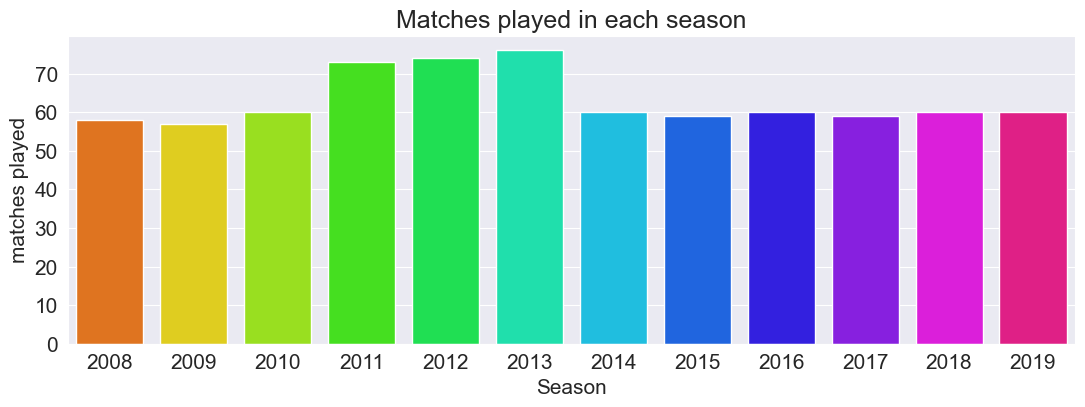

In [41]:
sns.set_style('darkgrid')
plt.figure(figsize=(13,4))
sns.countplot(x='Season',data=matches,palette='hsv')
plt.xlabel('Season',fontsize=15)
plt.ylabel('matches played',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches played in each season',fontsize=18)

plt.show()

In [42]:
teams_per_season = matches.groupby('Season')['winner'].value_counts()
teams_per_season

Season  winner                     
2008    Rajasthan Royals               13
        Kings XI Punjab                10
        Chennai Super Kings             9
        Delhi Daredevils                7
        Mumbai Indians                  7
                                       ..
2019    Kings XI Punjab                 6
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Rajasthan Royals                5
        Royal Challengers Bangalore     5
Name: count, Length: 100, dtype: int64

In [43]:
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])

# Use .items() instead of .iteritems() for Series objects
for items in teams_per_season.items():
    if items[0][0] == year:
        print(items)
        win_series = pd.DataFrame({
            'year': [year],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = pd.concat([win_per_season_df, win_series], ignore_index=True) 

((2008, 'Rajasthan Royals'), 13)
((2008, 'Kings XI Punjab'), 10)
((2008, 'Chennai Super Kings'), 9)
((2008, 'Delhi Daredevils'), 7)
((2008, 'Mumbai Indians'), 7)
((2008, 'Kolkata Knight Riders'), 6)
((2008, 'Royal Challengers Bangalore'), 4)
((2008, 'Deccan Chargers'), 2)


In [44]:
win_per_season_df


,year,team,wins
0,2008,Rajasthan Royals,13
1,2008,Kings XI Punjab,10
2,2008,Chennai Super Kings,9
3,2008,Delhi Daredevils,7
4,2008,Mumbai Indians,7
5,2008,Kolkata Knight Riders,6
6,2008,Royal Challengers Bangalore,4
7,2008,Deccan Chargers,2


### number of wins is a discrete value. Hence, we will plot a bar chart(barplot in Seaborn).

<Axes: xlabel='wins', ylabel='team'>

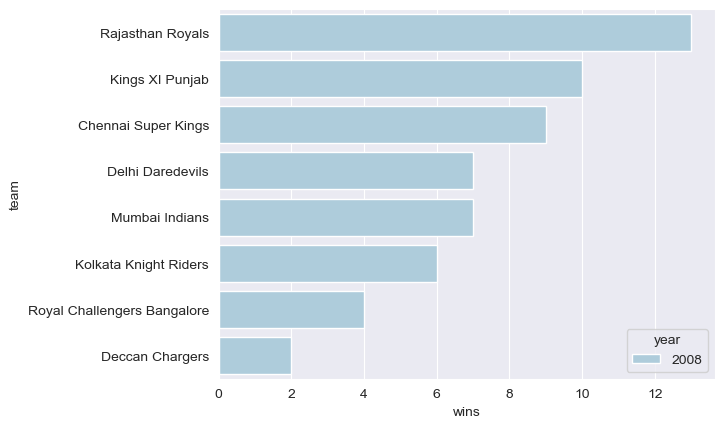

In [45]:
sns.barplot(x='wins', y='team', hue='year', data=win_per_season_df, palette='Paired')



## The most successful IPL team


In [46]:
team_wins_ser = matches['winner'].value_counts()

team_wins_df = pd.DataFrame(columns=["team", "wins"])

# Use .items() instead of .iteritems()
for items in team_wins_ser.items():
    temp_df1 = pd.DataFrame({
        'team': [items[0]],
        'wins': [items[1]]
    })
    team_wins_df = pd.concat([team_wins_df, temp_df1], ignore_index=True)


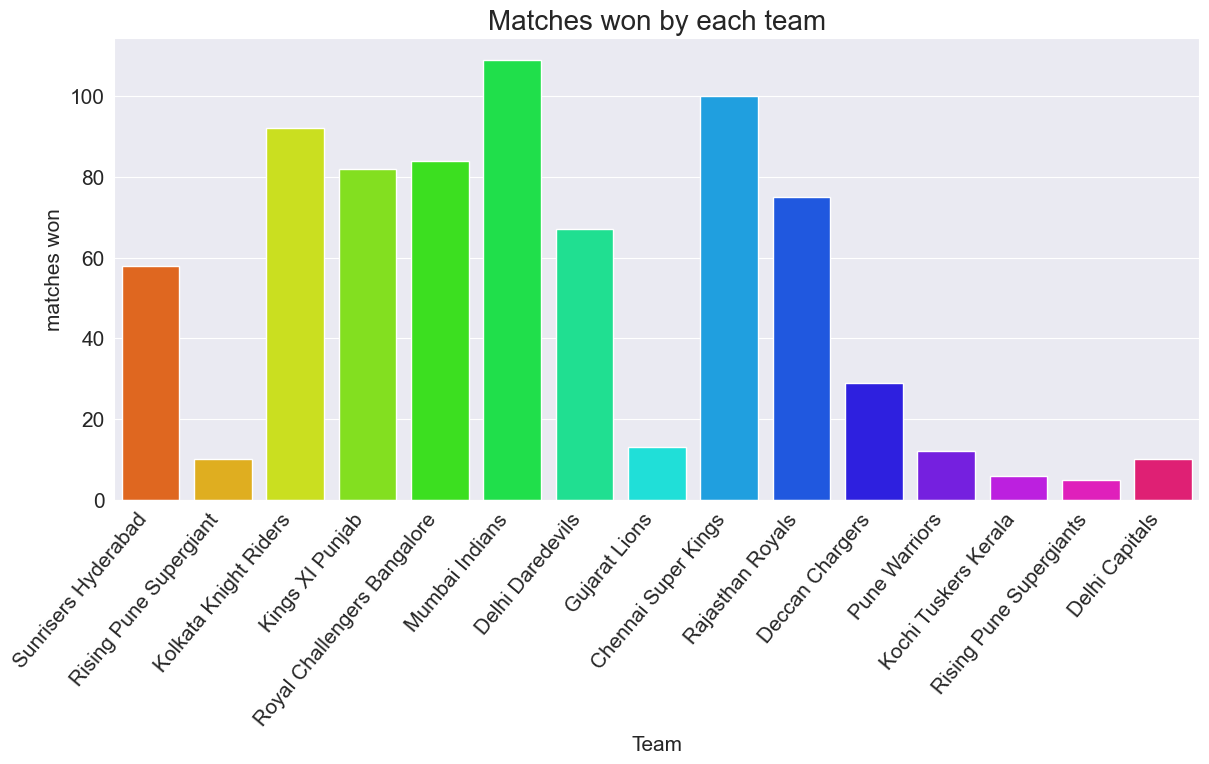

In [47]:
# number of matches won by each team
plt.figure(figsize=(14,6))
sns.countplot(x='winner',data=matches,palette='hsv')
plt.xlabel('Team',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Matches won by each team',fontsize=20)

plt.show()

Observations:
Mumbai Indians is the most successful team(as they have won the maximum number of IPL matches -120) followed by Chennai Super Kings and Kolkata Knight Riders.


## Most Valuable Player


In [48]:
#The player who has won the player_of_match title on most occasions is the most valuable player.

In [49]:
mvp_ser = matches['player_of_match'].value_counts()

mvp_ten_df = pd.DataFrame(columns=["player", "wins"])
count = 0

# Use .items() instead of .iteritems()
for items in mvp_ser.items():
    if count > 9:
        break
    else:
        temp_df = pd.DataFrame({
            'player': [items[0]],
            'wins': [items[1]]
        })
        mvp_ten_df = pd.concat([mvp_ten_df, temp_df], ignore_index=True)
        count += 1


In [50]:
mvp_ten_df

,player,wins
0,CH Gayle,21
1,AB de Villiers,20
2,RG Sharma,17
3,MS Dhoni,17
4,DA Warner,17
5,YK Pathan,16
6,SR Watson,15
7,SK Raina,14
8,G Gambhir,13
9,MEK Hussey,12


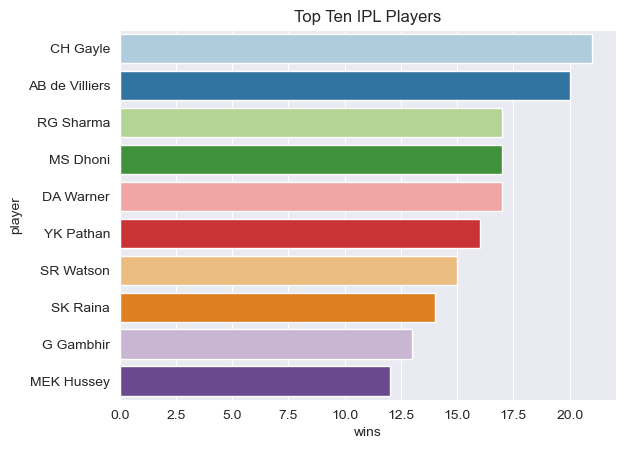

In [51]:
plt.title("Top Ten IPL Players")
sns.barplot(x='wins', y='player', data=mvp_ten_df, palette='Paired');

Observations:
AB de Villiers is the player who won the most player of the match awards and hence is the most valuable player.
Six Indian players have figured in the top ten IPL players list.

# The team that won the most number of toss


In [52]:
toss_ser = matches['toss_winner'].value_counts()

toss_df = pd.DataFrame(columns=["team", "wins"])

# Use .items() instead of .iteritems()
for items in toss_ser.items():
    temp_df3 = pd.DataFrame({
        'team': [items[0]],
        'wins': [items[1]]
    })
    toss_df = pd.concat([toss_df, temp_df3], ignore_index=True)


In [53]:
toss_df


,team,wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Chennai Super Kings,89
3,Royal Challengers Bangalore,81
4,Kings XI Punjab,81
5,Delhi Daredevils,80
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Pune Warriors,20


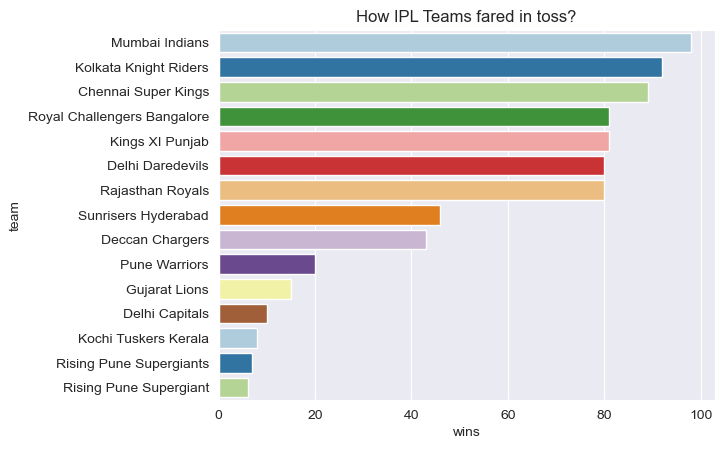

In [54]:
plt.title("How IPL Teams fared in toss?")
sns.barplot(x='wins', y='team', data=toss_df, palette='Paired');

Observations:
Mumbai Indians has won the most toss(till 2020) in IPL history.

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

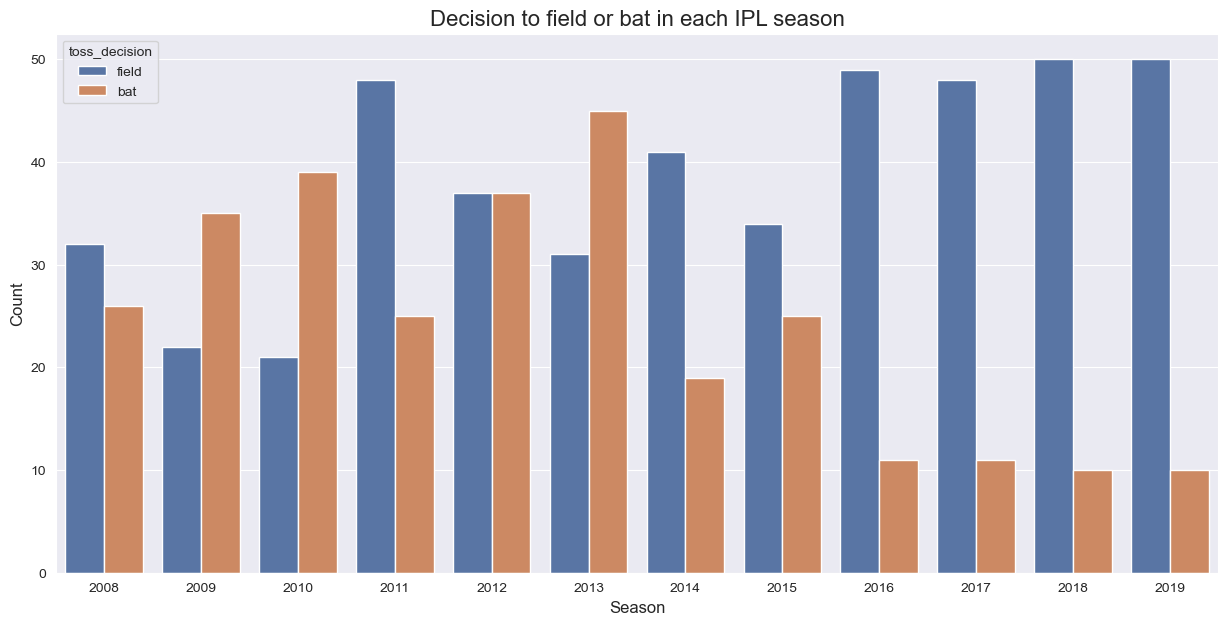

In [55]:
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              hue='toss_decision',
              data=matches,
              order = matches['Season'].value_counts().index.sort_values(),
              palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

We can see a trend that, decisions to field are more from IPL-2016 Season

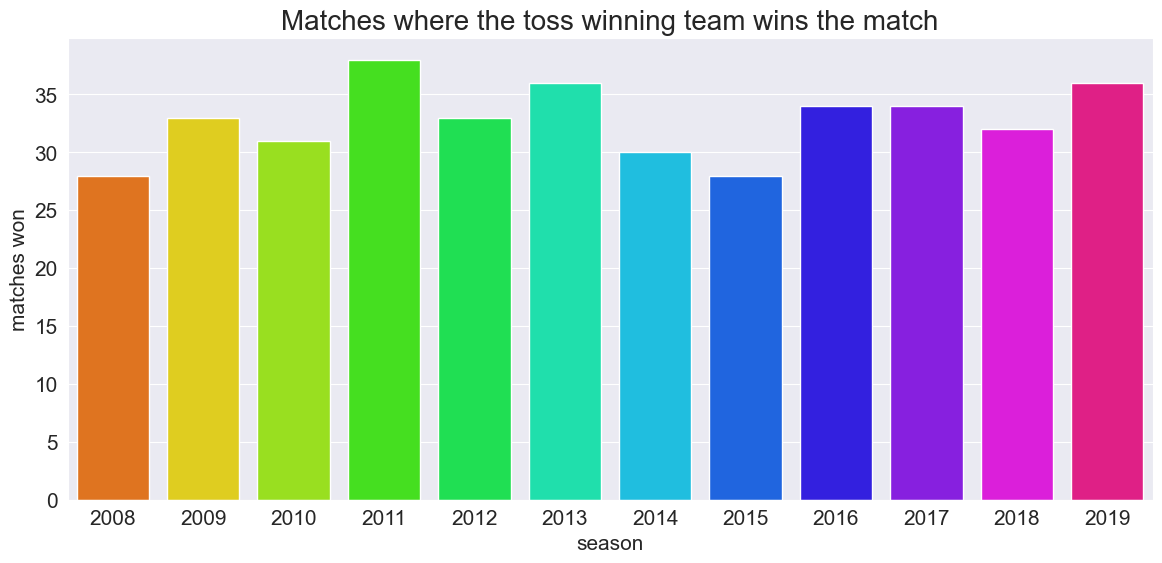

In [56]:
# number of matches where the toss wining team wins the match
plt.figure(figsize=(14,6))
sns.countplot(x='Season',data=matches[matches['toss_winner']==matches['winner']],palette='hsv')
plt.xlabel('season',fontsize=15)
plt.ylabel('matches won',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Matches where the toss winning team wins the match',fontsize=20)
plt.show()

All the top teams in IPL are successful in winning the toss as well.

In [57]:
win_count = 0
for index, value in matches.iterrows():
    if(value['toss_winner']==value['winner']):
#         print(value['winner'])
        win_count += 1

print(f'The number of times the team winning toss have won: {win_count}')
prob = win_count/len(matches)
print('The probability of winning if won the toss: {:.2f}' .format(prob)) 

The number of times the team winning toss have won: 393
The probability of winning if won the toss: 0.52


The probability of winning when the team had won the toss is approx 51%. So winning toss gives a slight edge over the opponent.

# BATING STAT

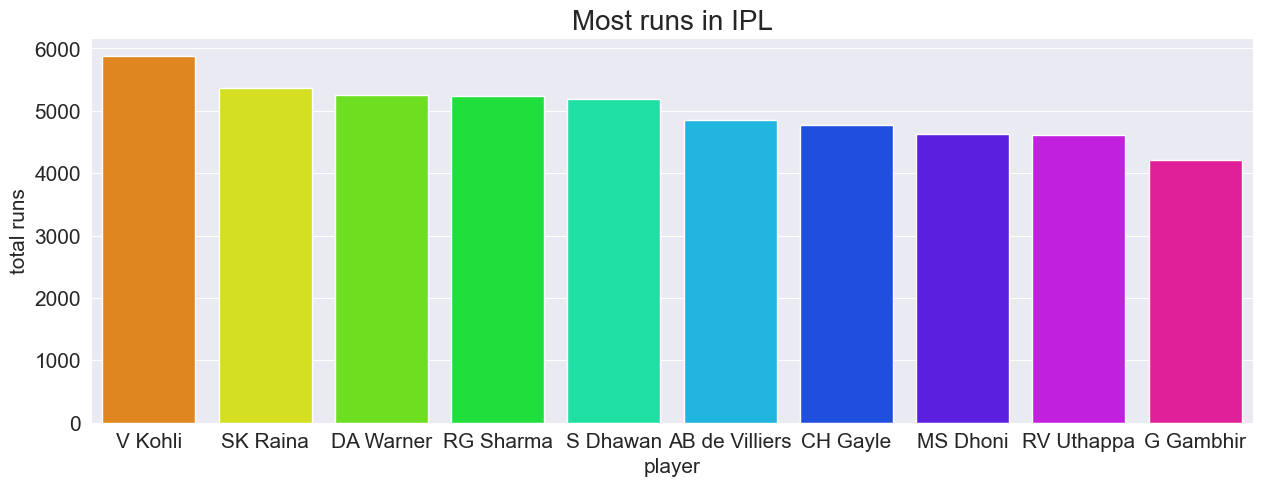

In [58]:
most_runs=Ball_by_Ball.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)
most_runs=most_runs.to_frame().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='batsman',y='batsman_runs',data=most_runs.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('total runs',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most runs in IPL',fontsize=20) 
plt.show()

In [59]:
most_runs_season=all_data.groupby(['Season','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_season=most_runs_season.to_frame().reset_index()
most_runs_season=most_runs_season.sort_values(by=['Season','batsman_runs'],ascending=False)
most_runs_season=most_runs_season.drop_duplicates(['Season'],keep='first')
most_runs_season

,Season,batsman,batsman_runs


In [60]:
# most runs in a match
most_runs_match=all_data.groupby(['id','batsman'])['batsman_runs'].sum().sort_values(ascending=False)
most_runs_match=most_runs_match.to_frame().reset_index()
most_runs_match[:10]

,id,batsman,batsman_runs


# FOUR

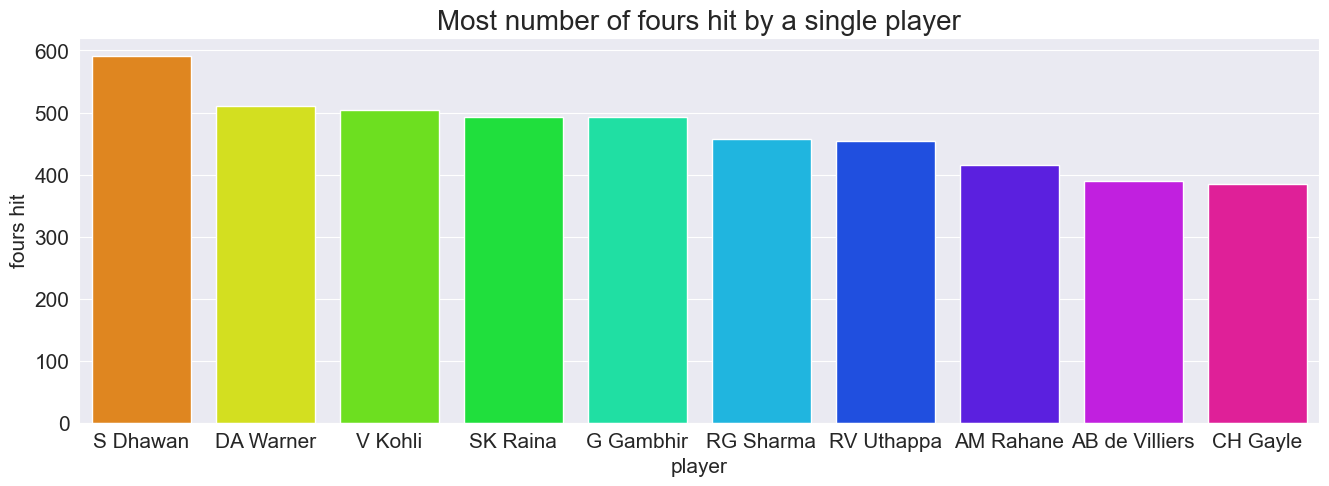

In [61]:
fours_hit=Ball_by_Ball[Ball_by_Ball['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
fours_hit=fours_hit.to_frame().reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='batsman',y='batsman_runs',data=fours_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of fours hit by a single player',fontsize=20) 
plt.show()

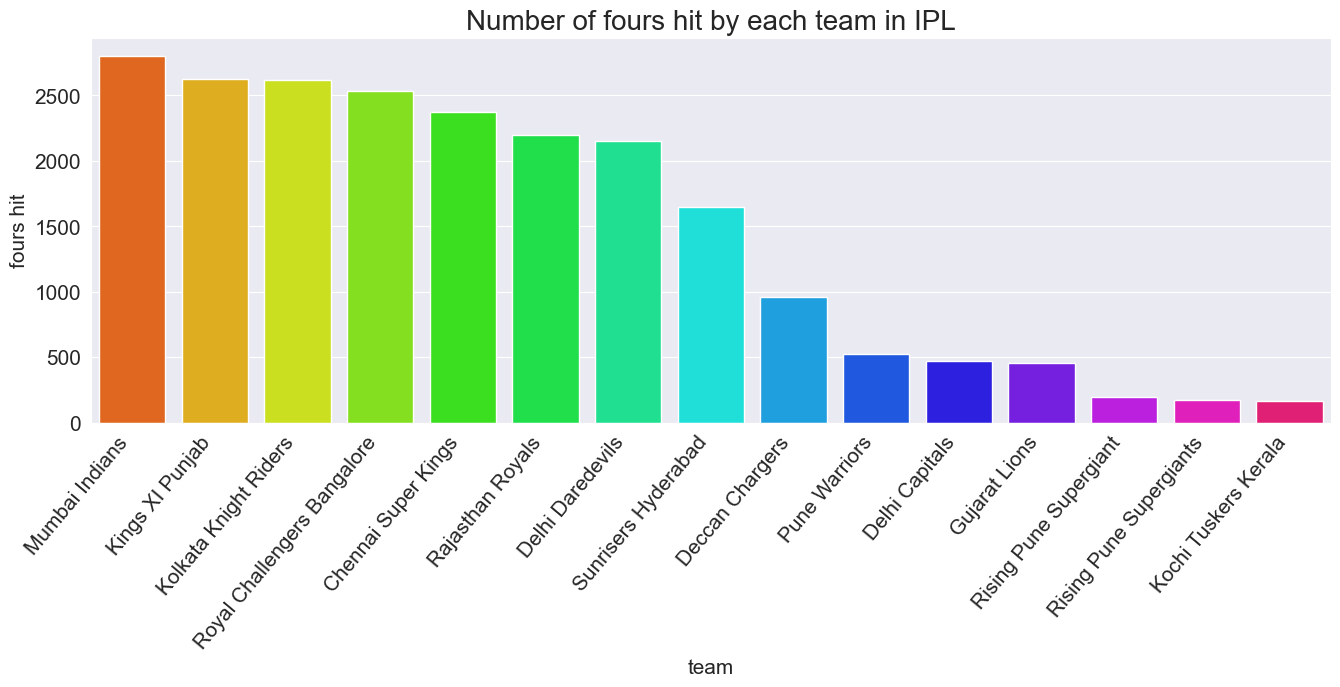

In [62]:
fours_team=Ball_by_Ball[Ball_by_Ball['batsman_runs']==4].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
fours_team=fours_team.to_frame().reset_index()

plt.figure(figsize=(16,5))
sns.barplot(x='batting_team',y='batsman_runs',data=fours_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('fours hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of fours hit by each team in IPL',fontsize=20) 
plt.show()

# sixes

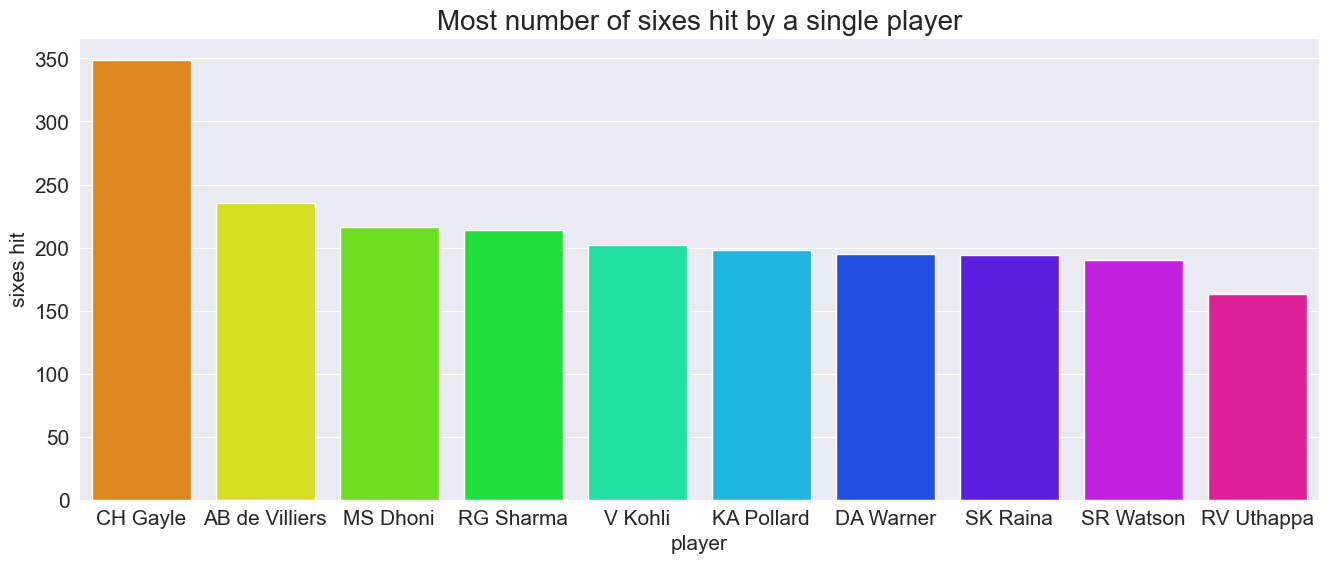

In [64]:
sixes_hit=Ball_by_Ball[Ball_by_Ball['batsman_runs']==6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False)
sixes_hit=sixes_hit.to_frame().reset_index()

plt.figure(figsize=(16,6))
sns.barplot(x='batsman',y='batsman_runs',data=sixes_hit.iloc[:10],palette='hsv')
plt.xlabel('player',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Most number of sixes hit by a single player',fontsize=20) 
plt.show()

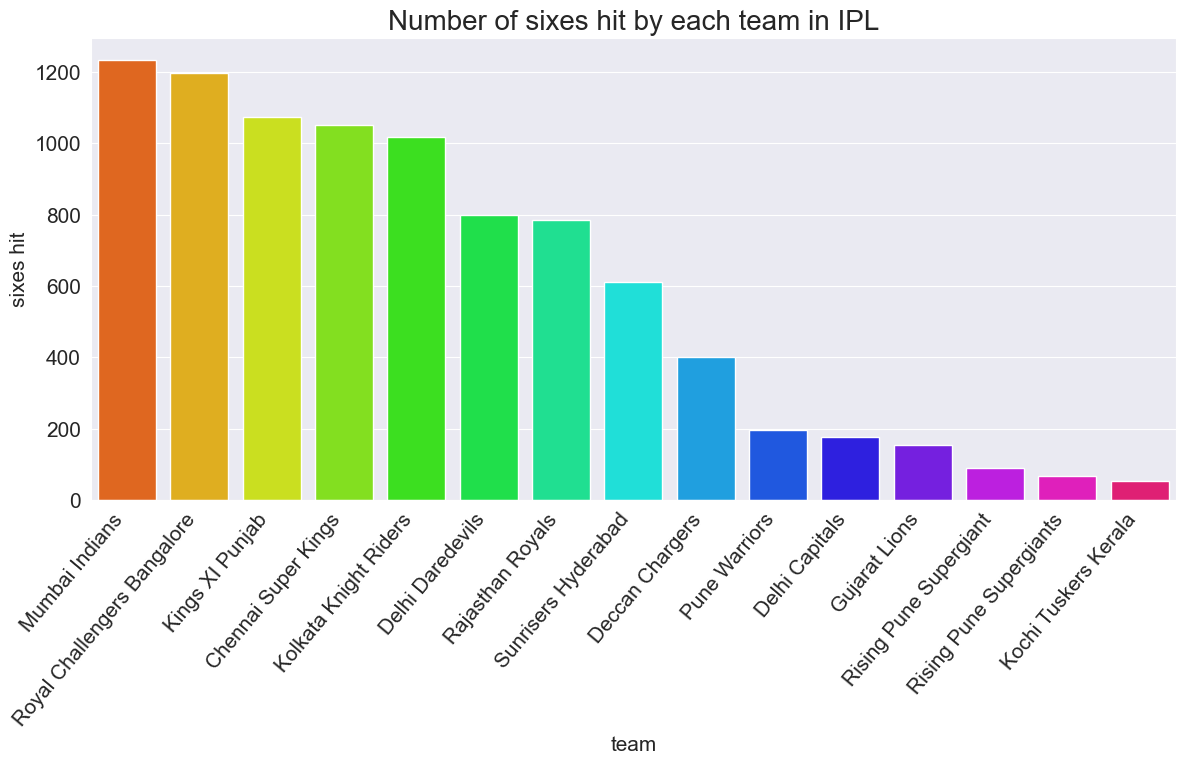

In [65]:
sixes_team=Ball_by_Ball[Ball_by_Ball['batsman_runs']==6].groupby('batting_team')['batsman_runs'].count().sort_values(ascending=False)
sixes_team=sixes_team.to_frame().reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='batting_team',y='batsman_runs',data=sixes_team,palette='hsv')
plt.xlabel('team',fontsize=15)
plt.ylabel('sixes hit',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Number of sixes hit by each team in IPL',fontsize=20) 
plt.show()

# Bowling Stat

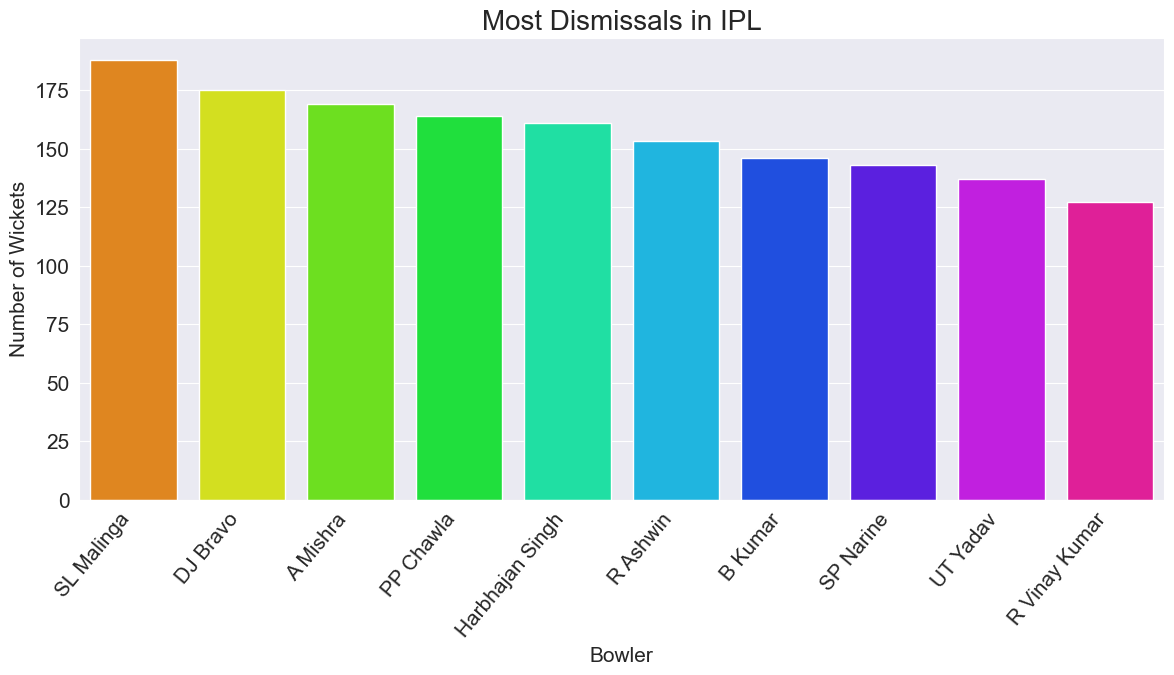

In [72]:
# Calculate most wickets
most_wickets = Ball_by_Ball[Ball_by_Ball['dismissal_kind'].notnull()]['bowler'].value_counts()
most_wickets_df = most_wickets.to_frame().reset_index()
most_wickets_df.columns = ['bowler', 'wickets']  # Renaming columns for clarity

# Plot the top 10 bowlers
plt.figure(figsize=(14,6))
sns.barplot(x='bowler', y='wickets', data=most_wickets_df.head(10), palette='hsv')

# Customize plot
plt.xlabel('Bowler', fontsize=15)
plt.ylabel('Number of Wickets', fontsize=15)
plt.xticks(fontsize=15, rotation=50, ha='right')
plt.yticks(fontsize=15)
plt.title('Most Dismissals in IPL', fontsize=20)

# Show plot
plt.show()


# CATCHES

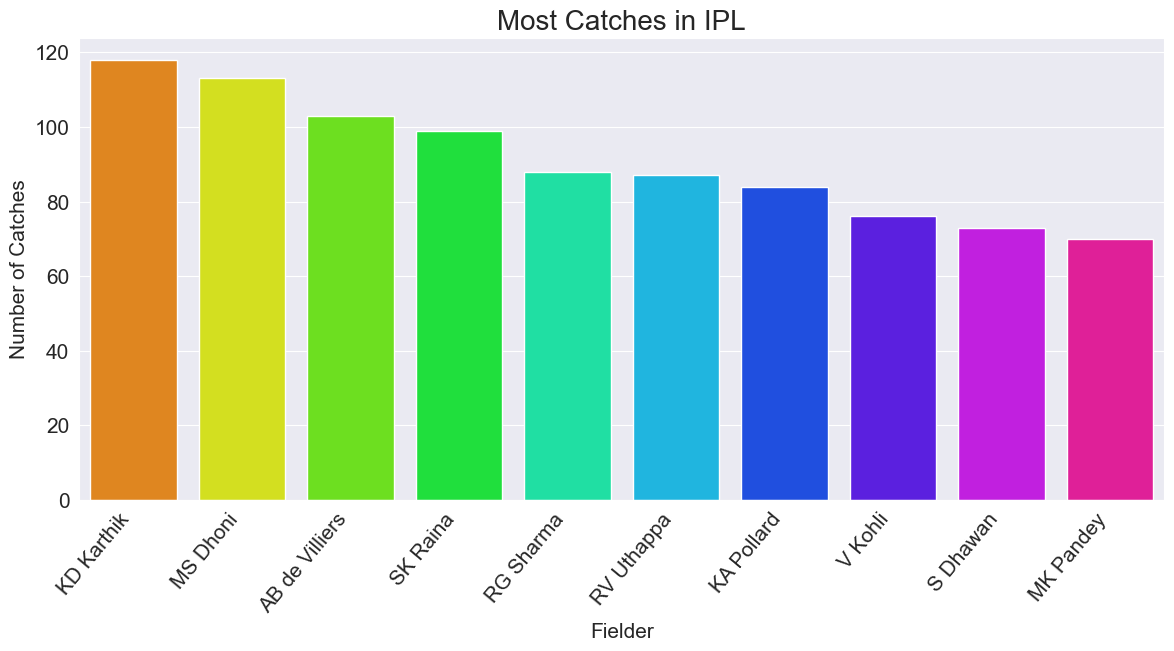

In [77]:
# Calculate most catches
most_catches = Ball_by_Ball[Ball_by_Ball['dismissal_kind'] == 'caught']['fielder'].value_counts()
most_catches_df = most_catches.to_frame().reset_index()
most_catches_df.columns = ['fielder', 'catches']  # Renaming columns for clarity

# Plot the top 10 fielders
plt.figure(figsize=(14,6))
sns.barplot(x='fielder', y='catches', data=most_catches_df.head(10), palette='hsv')

# Customize plot
plt.xlabel('Fielder', fontsize=15)
plt.ylabel('Number of Catches', fontsize=15)
plt.xticks(fontsize=15, rotation=50, ha='right')
plt.yticks(fontsize=15)
plt.title('Most Catches in IPL', fontsize=20)

# Show plot
plt.show()


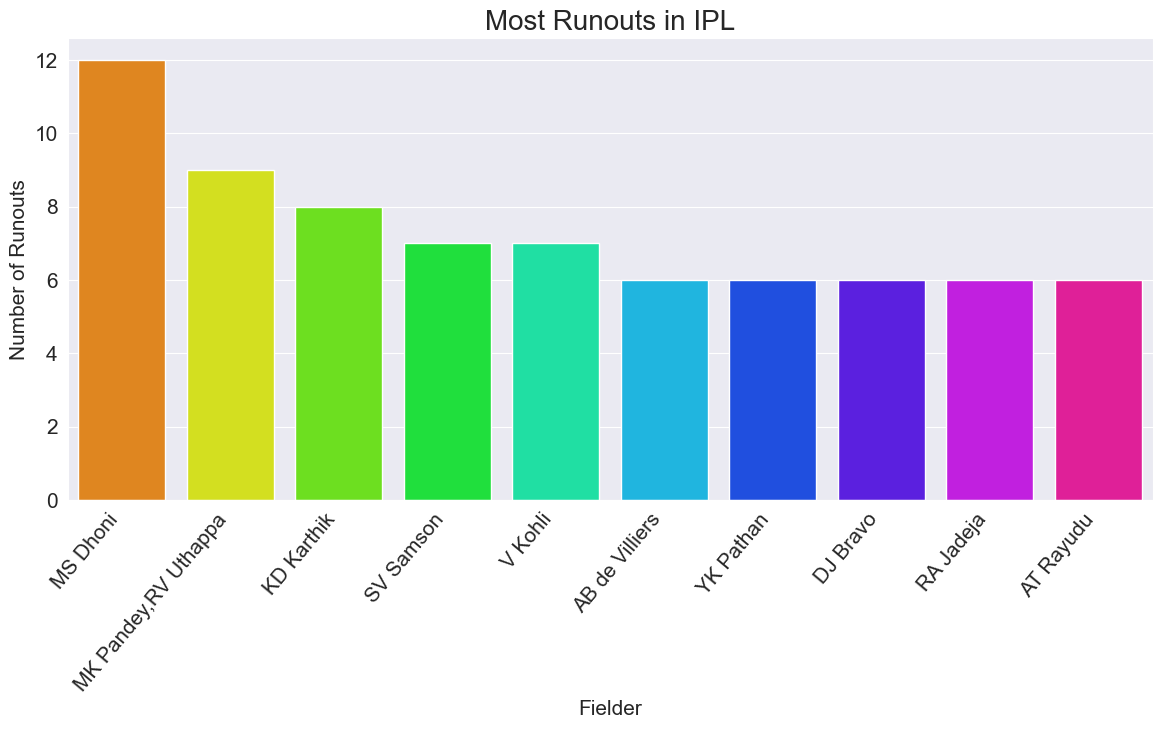

In [78]:
# Calculate most runouts
most_runouts = Ball_by_Ball[Ball_by_Ball['dismissal_kind'] == 'run out']['fielder'].value_counts()
most_runouts_df = most_runouts.to_frame().reset_index()
most_runouts_df.columns = ['fielder', 'runouts']  # Renaming columns for clarity

# Plot the top 10 fielders with most runouts
plt.figure(figsize=(14,6))
sns.barplot(x='fielder', y='runouts', data=most_runouts_df.head(10), palette='hsv')

# Customize plot
plt.xlabel('Fielder', fontsize=15)
plt.ylabel('Number of Runouts', fontsize=15)
plt.xticks(fontsize=15, rotation=50, ha='right')
plt.yticks(fontsize=15)
plt.title('Most Runouts in IPL', fontsize=20)

# Show plot
plt.show()


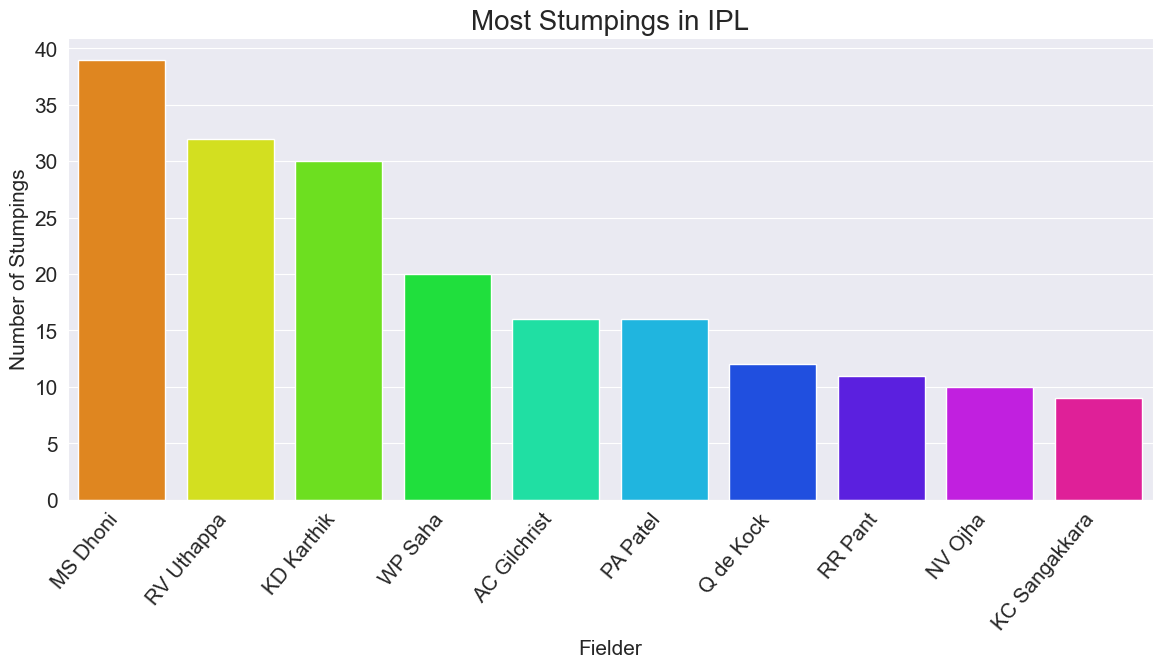

In [79]:
# Calculate most stumpings
most_stumpings = Ball_by_Ball[Ball_by_Ball['dismissal_kind'] == 'stumped']['fielder'].value_counts()
most_stumpings_df = most_stumpings.to_frame().reset_index()
most_stumpings_df.columns = ['fielder', 'stumpings']  # Renaming columns for clarity

# Plot the top 10 fielders with most stumpings
plt.figure(figsize=(14,6))
sns.barplot(x='fielder', y='stumpings', data=most_stumpings_df.head(10), palette='hsv')

# Customize plot
plt.xlabel('Fielder', fontsize=15)
plt.ylabel('Number of Stumpings', fontsize=15)
plt.xticks(fontsize=15, rotation=50, ha='right')
plt.yticks(fontsize=15)
plt.title('Most Stumpings in IPL', fontsize=20)

# Show plot
plt.show()

## Umpire Stat

In [80]:
df_umpire=matches[['umpire1','umpire2']]
df_umpire.dropna(inplace=True)
df_umpire

,umpire1,umpire2
0,AY Dandekar,NJ Llong
1,A Nand Kishore,S Ravi
2,Nitin Menon,CK Nandan
3,AK Chaudhary,C Shamshuddin
5,A Deshmukh,NJ Llong
...,...,...
750,KN Ananthapadmanabhan,C Shamshuddin
751,Nanda Kishore,O Nandan
752,Nigel Llong,Nitin Menon
754,Sundaram Ravi,Bruce Oxenford


In [81]:
df_umpire['umpire1'].value_counts()


umpire1
HDPK Dharmasena    73
Asad Rauf          51
S Ravi             49
AK Chaudhary       43
Aleem Dar          38
                   ..
Nanda Kishore       1
SJA Taufel          1
A Nanda Kishore     1
SL Shastri          1
Sundaram Ravi       1
Name: count, Length: 61, dtype: int64

In [82]:
df_umpire['umpire2'].value_counts()


umpire2
C Shamshuddin       57
S Ravi              57
SJA Taufel          54
RJ Tucker           38
CK Nandan           36
                    ..
Kumar Dharmasena     1
SD Fry               1
SJ Davis             1
Subroto Das          1
Ian Gould            1
Name: count, Length: 65, dtype: int64

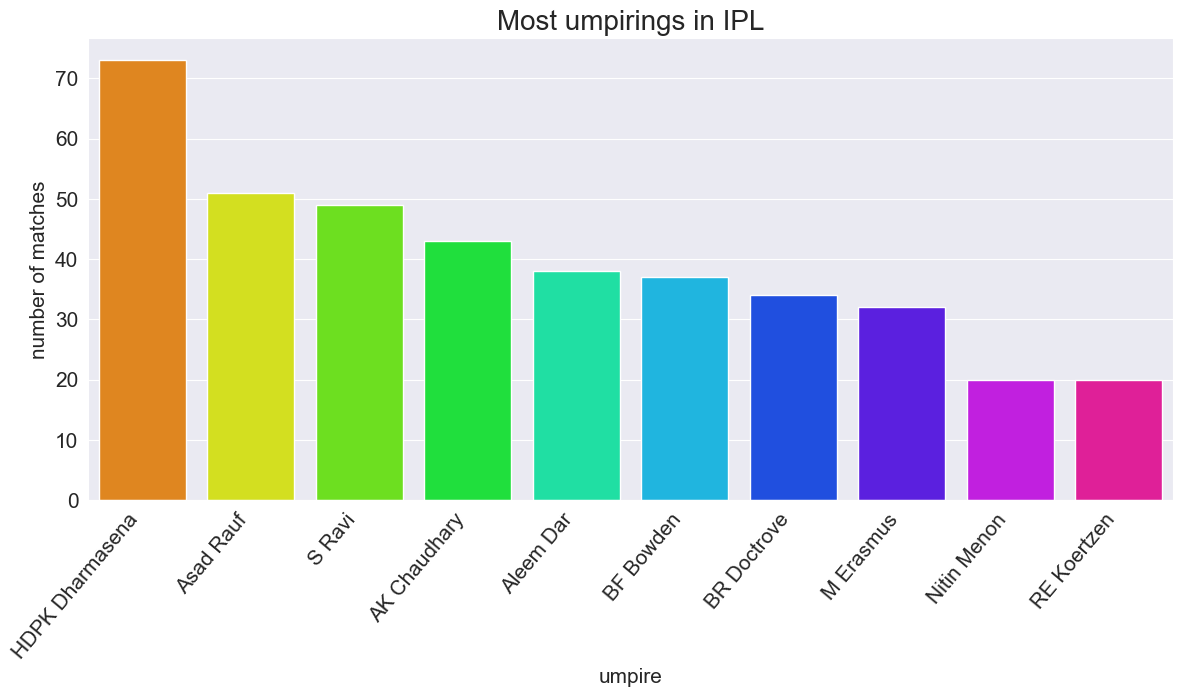

In [83]:
most_umpiring=df_umpire['umpire1'].value_counts()
most_umpiring=most_umpiring.to_frame().reset_index()
most_umpiring.columns=['umpire','count']

plt.figure(figsize=(14,6))
sns.barplot(x='umpire',y='count',data=most_umpiring[:10],palette='hsv')
plt.xlabel('umpire',fontsize=15)
plt.ylabel('number of matches',fontsize=15)
plt.xticks(fontsize=15,rotation=50,ha='right')
plt.yticks(fontsize=15)
plt.title('Most umpirings in IPL',fontsize=20) 
plt.show()

## Inferences and Conclusion


Let’s summarize the important observations we made during Exploratory Data Analysis:

‣ Mumbai Indians is the most successful team in IPL.

‣ Mumbai Indians has won the most number of toss.

‣ The probability of winning when the team had won the toss is approx 51%. 
  So winning toss gives a slight edge over the opponent.

‣ Win toss and field first so as to win more matches irrespective of venues.

‣ Seven Indian batsman have figured in the top ten IPL batsman list.

‣ AB de Villiers has won the maximum number of player of the match title.

‣During auctions,if franchise is looking for a consistent batsman, they can go for Raina

‣Go for pollard,warner,Rusell, Gayle, AB if looking for the big hitters who can also score a lot of runs

‣DA Warner has had the best average of 37 among all batsmen with more than 10 seasons
    
‣Malinga has been the most impressive bowler in IPL with more than 170 wickets at an average of 16.27, economy of 6.16  
‣If franchise is looking for a consistent bowler who can get you wickets and also not give away too many runs then   Malinga could be a good option.
